In [1]:
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = tree.DecisionTreeClassifier()
vec = CountVectorizer(analyzer='char')

In [ ]:
#https://puzzling.stackexchange.com/questions/65665/optimizing-month-abbreviation-to-number/65680#65680

In [2]:
data = (
    ["Jan"] * 31 +
    ["Feb"] * 28 +
    ["Mar"] * 31 +
    ["Apr"] * 30 +
    ["May"] * 31 +
    ["Jun"] * 30 +
    ["Jul"] * 31 +
    ["Aug"] * 31 +
    ["Sep"] * 30 +
    ["Oct"] * 31 +
    ["Nov"] * 30 +
    ["Dec"] * 31
)

target = (
    [1] * 31 +
    [2] * 28 +
    [3] * 31 +
    [4] * 30 +
    [5] * 31 +
    [6] * 30 +
    [7] * 31 +
    [8] * 31 +
    [9] * 30 +
    [10] * 31 +
    [11] * 30 +
    [12] * 31
)


In [3]:
class_names = (
    ["Jan"] +
    ["Feb"]+
    ["Mar"] +
    ["Apr"] +
    ["May"]  +
    ["Jun"]  +
    ["Jul"] +
    ["Aug"]  +
    ["Sep"]  +
    ["Oct"]  +
    ["Nov"]  +
    ["Dec"] 
)

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
target_one_hot = enc.fit_transform([[x] for x in target])  

In [5]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'fst': x[0], 'snd': x[1], 'thd': x[2]} for x in data]
X = v.fit_transform(D)


In [6]:
clf = clf.fit(X, data)

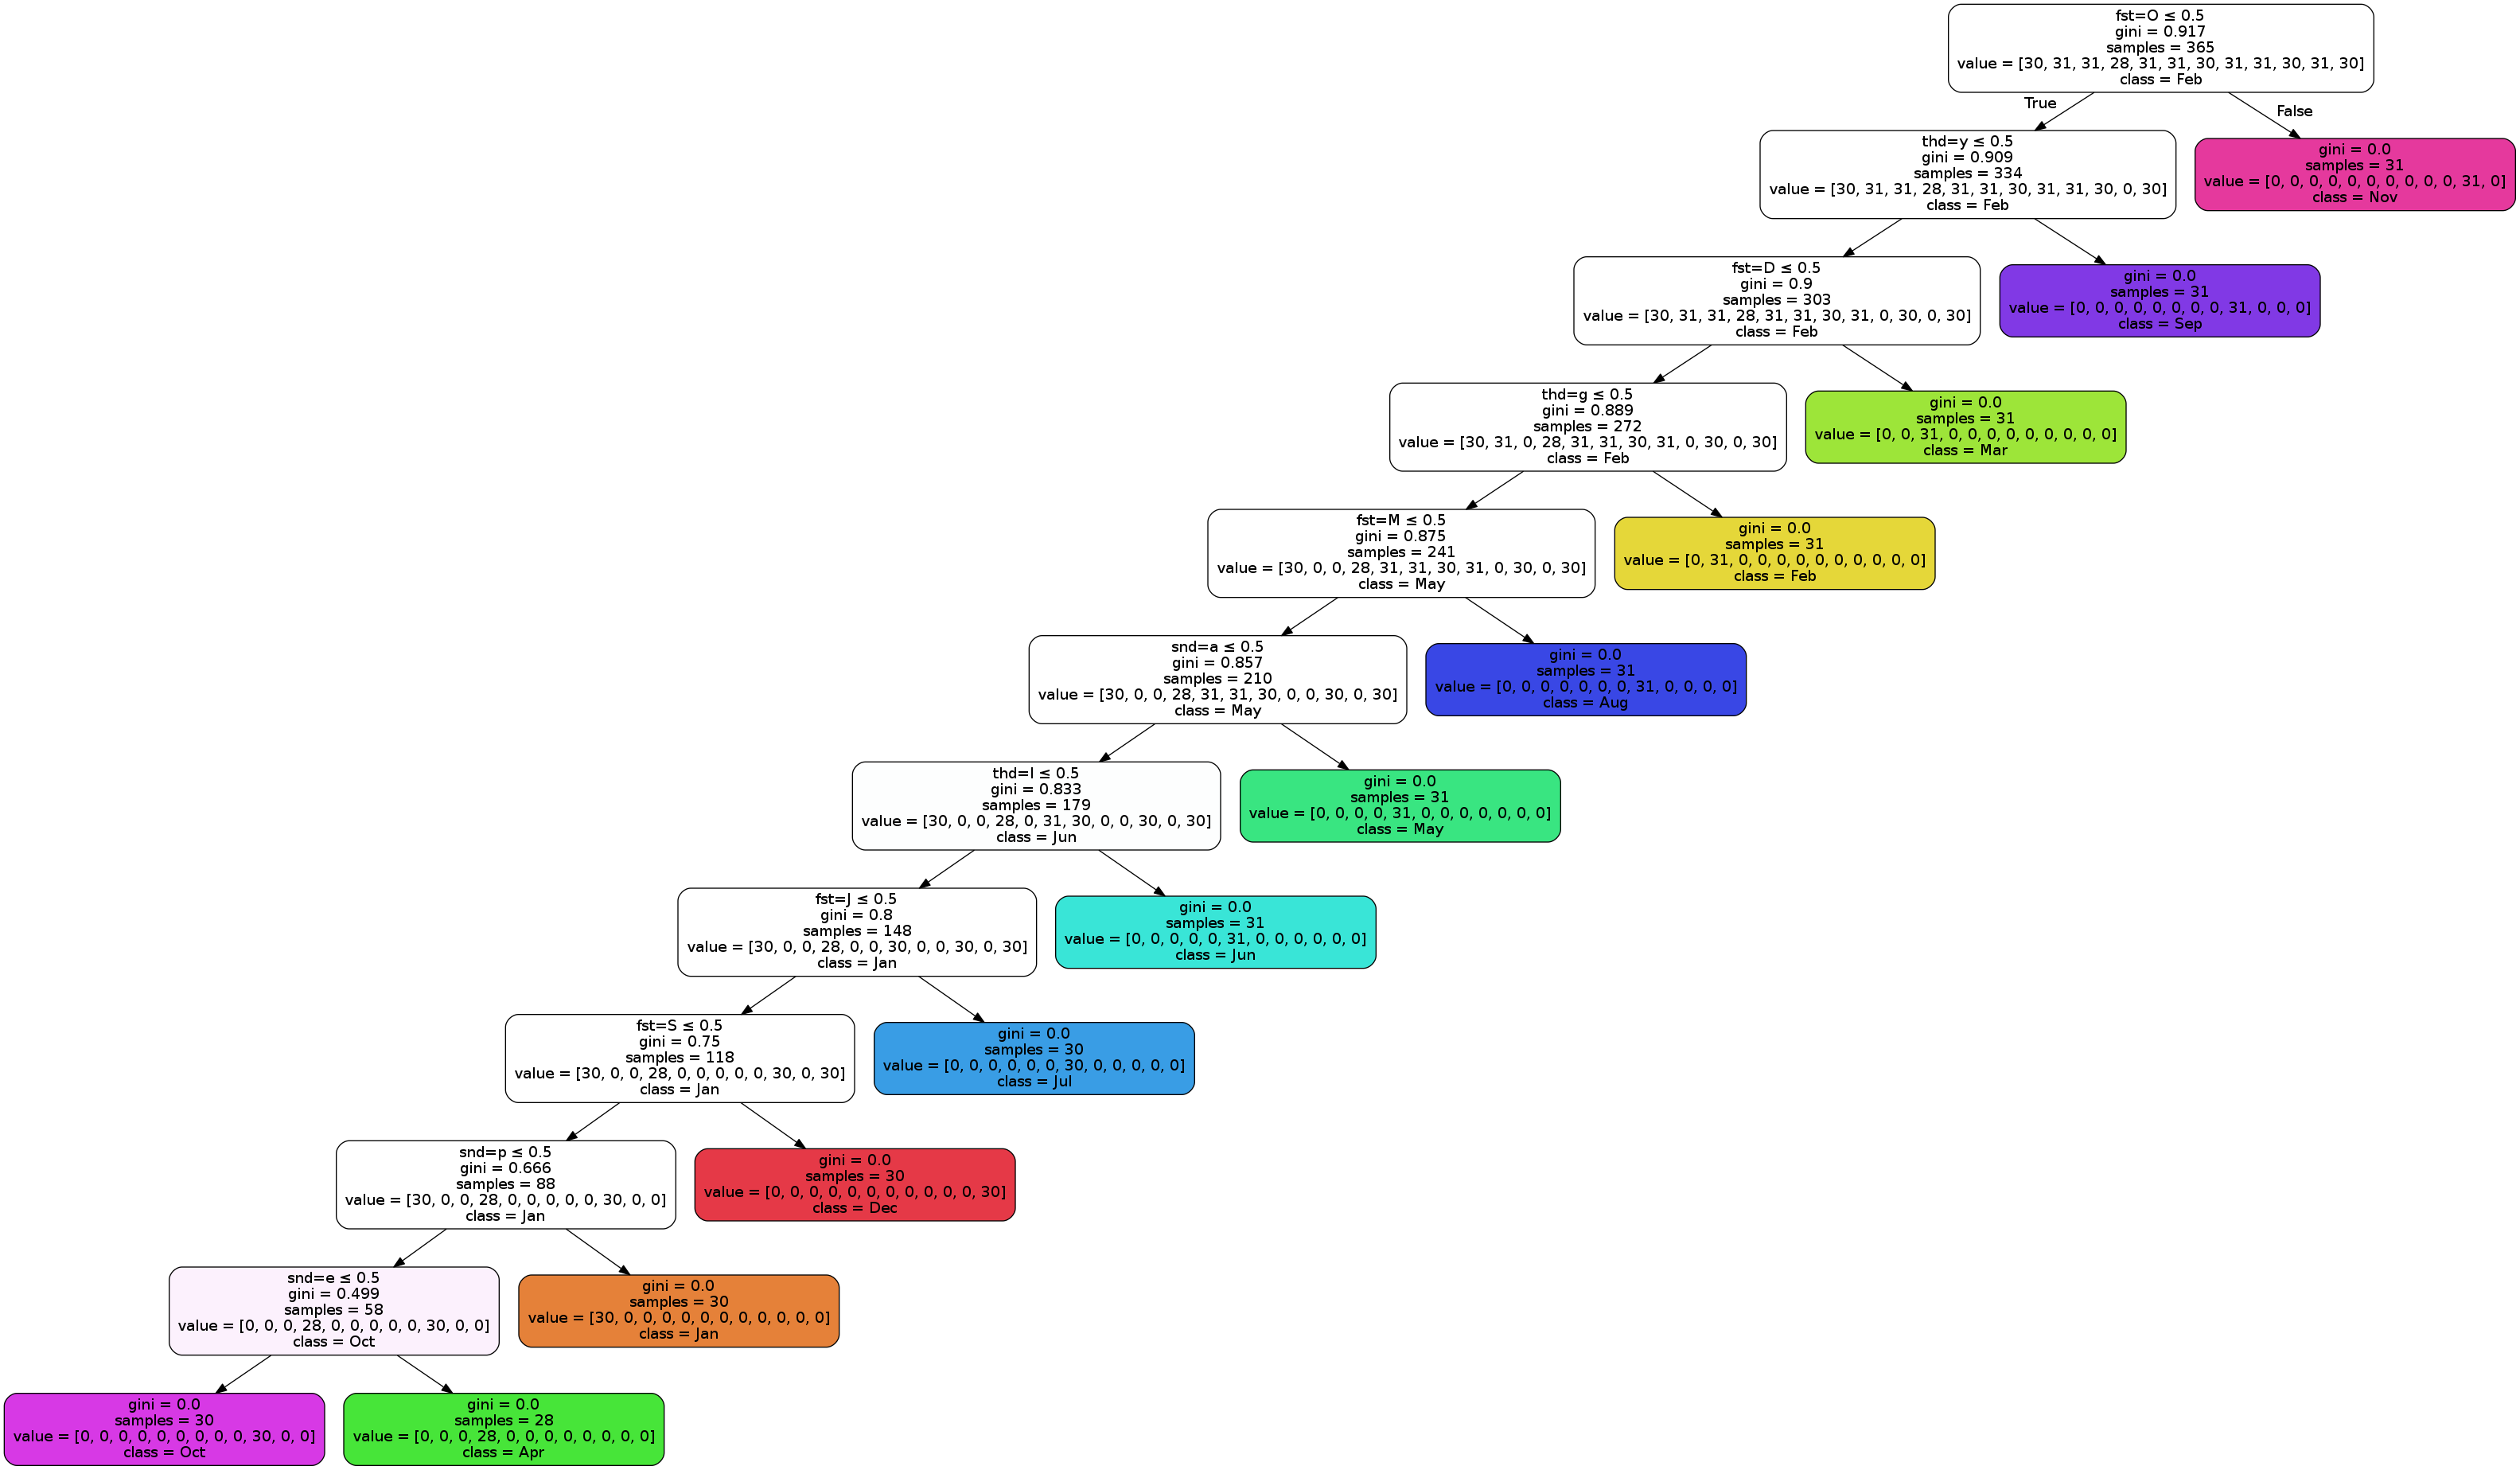

In [7]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=v.feature_names_,  
                         class_names=class_names,
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

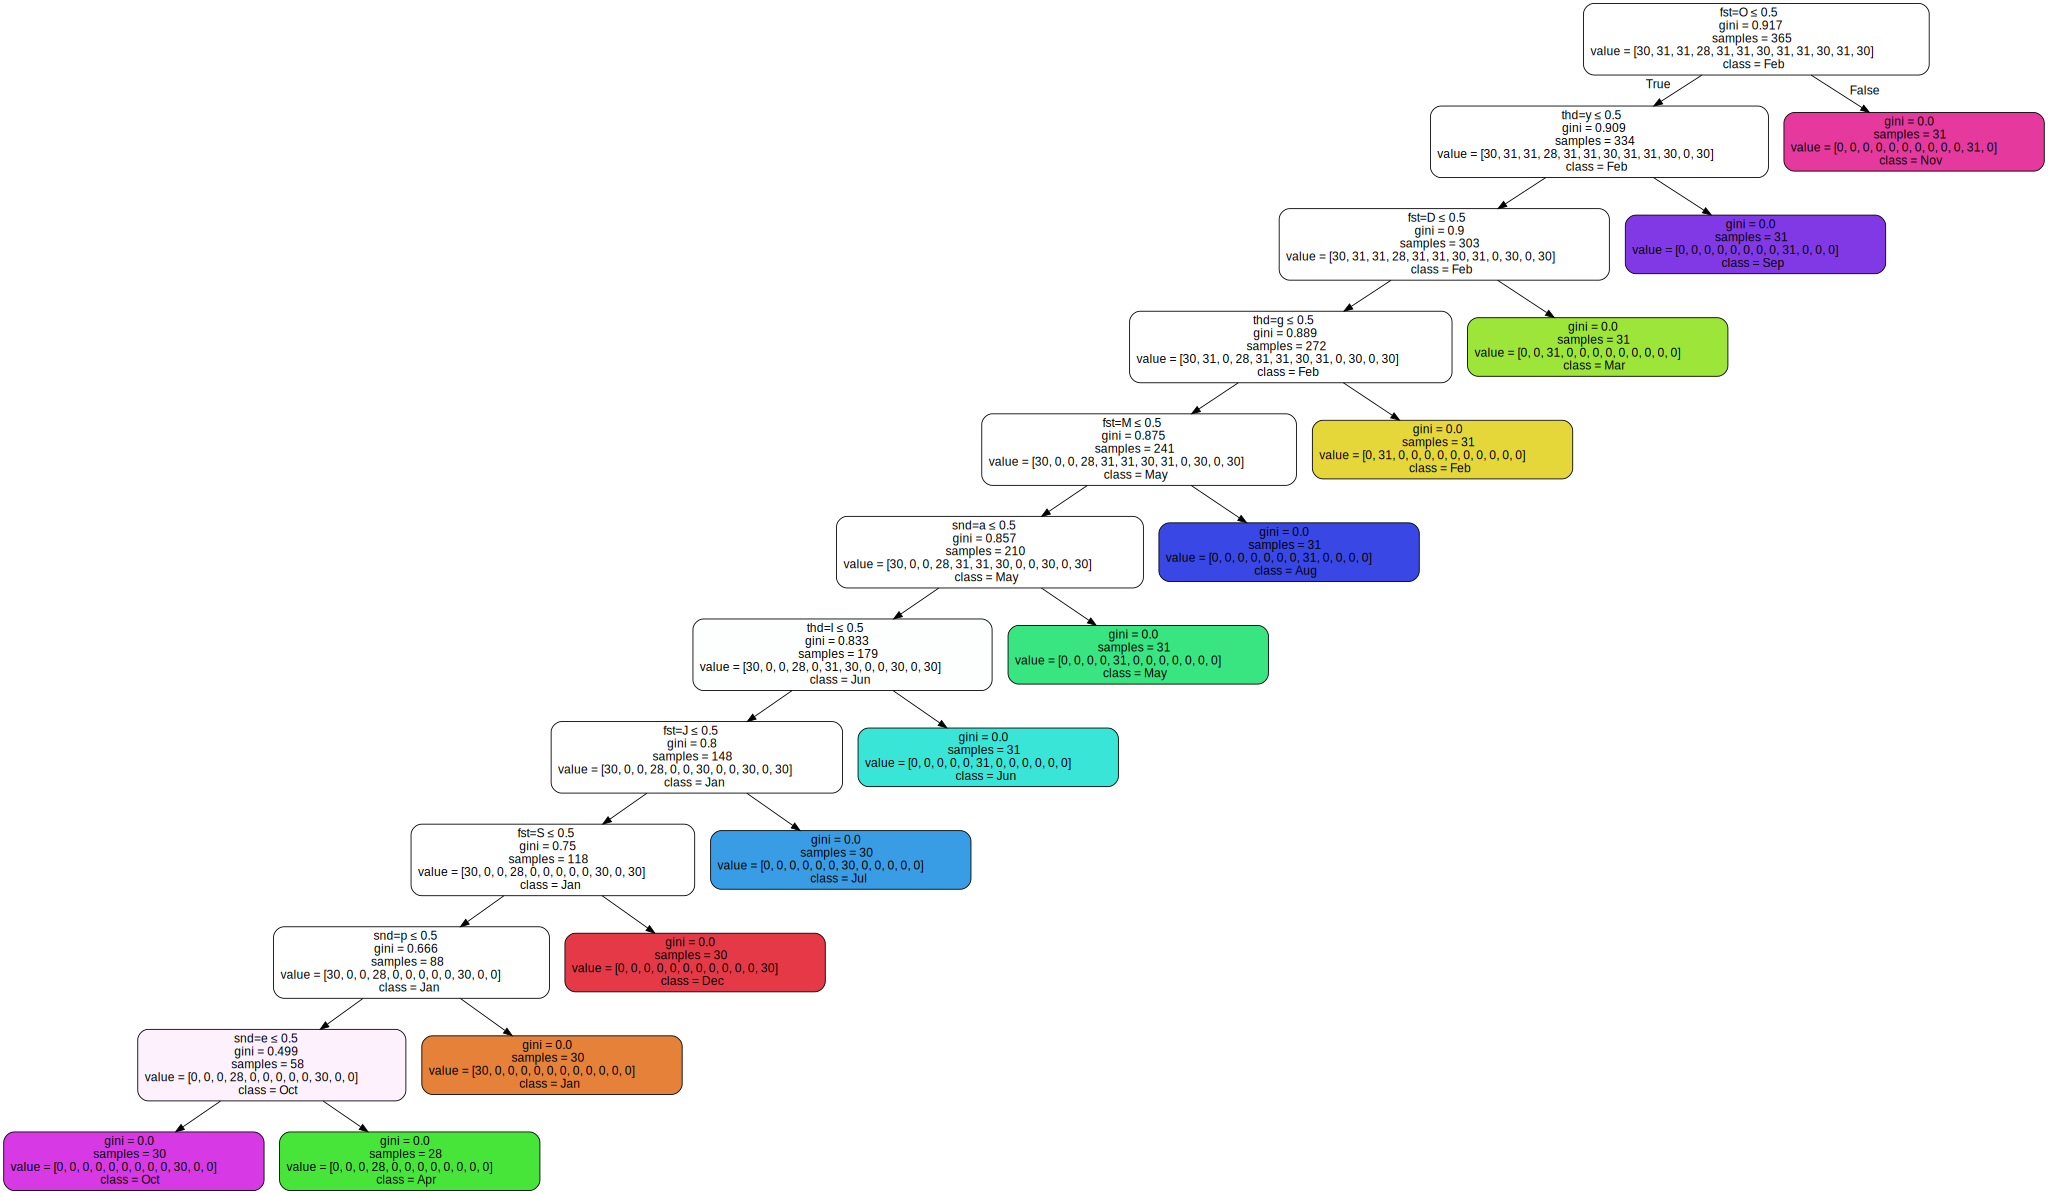

In [8]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=v.feature_names_,  
                         class_names=class_names,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [9]:
sum_of_branch_360 = 0
def traverse(nodeId=0, path=[]):
    global sum_of_branch_360
    r = clf.tree_.children_right[nodeId]
    l = clf.tree_.children_left[nodeId]
    if r != -1:
        traverse(r, path+[nodeId])
        traverse(l, path+[nodeId])
    else:
        print(path, clf.tree_.value[nodeId][0])
        sum_of_branch_360 += len(path) * max(clf.tree_.value[nodeId][0])
traverse()
print(sum_of_branch_360)

[0] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 31.  0.]
[0, 1] [ 0.  0.  0.  0.  0.  0.  0.  0. 31.  0.  0.  0.]
[0, 1, 2] [ 0.  0. 31.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0, 1, 2, 3] [ 0. 31.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0, 1, 2, 3, 4] [ 0.  0.  0.  0.  0.  0.  0. 31.  0.  0.  0.  0.]
[0, 1, 2, 3, 4, 5] [ 0.  0.  0.  0. 31.  0.  0.  0.  0.  0.  0.  0.]
[0, 1, 2, 3, 4, 5, 6] [ 0.  0.  0.  0.  0. 31.  0.  0.  0.  0.  0.  0.]
[0, 1, 2, 3, 4, 5, 6, 7] [ 0.  0.  0.  0.  0.  0. 30.  0.  0.  0.  0.  0.]
[0, 1, 2, 3, 4, 5, 6, 7, 8] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 30.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [30.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [ 0.  0.  0. 28.  0.  0.  0.  0.  0.  0.  0.  0.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 30.  0.  0.]
2316.0
